In [187]:
import numpy as np
import matplotlib.pyplot as plot
from PIL import Image
import matplotlib.cm as cm
from scipy.optimize import curve_fit

In [53]:
#import images into array
imageset = []
imageset.append(plot.imread('38photo.jpeg'))
imageset.append(plot.imread('44photo.jpeg'))
imageset.append(plot.imread('50photo.jpeg'))
imageset.append(plot.imread('60photo.jpeg'))
imageset.append(plot.imread('66photo.jpeg'))
imageset.append(plot.imread('76photo.jpeg'))
imageset.append(plot.imread('84photo.jpeg'))
imageset.append(plot.imread('90photo.jpeg'))
imageset.append(plot.imread('96photo.jpeg'))

#slice out the red 
redset = []
for i in range(0,9):
    redset.append(imageset[i][:,:,0])

In [125]:
#threshold the intenstities 
threshold = []
for i in range(0,9):
    boolean = redset[i] > 140 
    threshold.append(boolean*redset[i])

In [147]:
#Put centers of mass into array 
cm_positions = []
for i in range(0,9):
    summed_intensity = threshold[i].sum()
    positions = np.indices(threshold[i].shape)
    Rx = np.sum(positions[0]*threshold[i])
    Ry = np.sum(positions[1]*threshold[i])
    R = ((4.8*10.0**(-6.0))*Ry, (4.8*10.0**(-6.0))*Rx)/summed_intensity
    cm_positions.append(R)

In [317]:
#Make arrays for frequency, frequency error, lengths, length error
frequency = [95.5,(148.4+148.7)/2,183.935,235.8,261.9,294.0,308.66,(315.7+316.2)/2,(333.38+333.42)/2]
frequencyerr = [0.2,0.15,0.015,0.2,0.2,0.2,0.09,315.95-315.7,0.02]
length = [0.39,0.39,0.70,1.201,1.311,3.511,4.637]
lengtherr = [0.003,0.003,0.003,0.004,0.004,0.007,0.005]

d = length[0]+length[2]
f = length[2] + length[3]+length[4]
s2 = length[5] + length[6]
s = length[0]+length[2]+length[3]+length[4]

Text(0, 0.5, 'y positions (meters)')

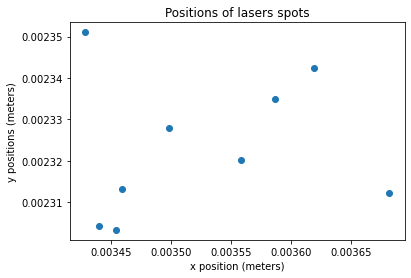

In [301]:
plot.scatter(np.array(cm_positions)[:,0],np.array(cm_positions)[:,1])
plot.title('Positions of lasers spots')
plot.xlabel('x position (meters)')
plot.ylabel('y positions (meters)')

Text(0, 0.5, 'Change in x (meters)')

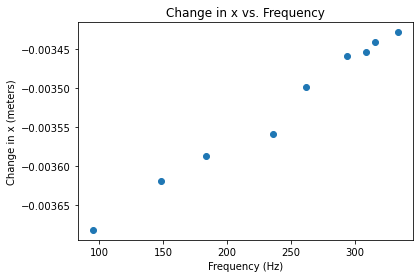

In [302]:
plot.scatter(np.array(frequency),-np.array(cm_positions)[:,0])
plot.title('Change in x vs. Frequency')
plot.xlabel('Frequency (Hz)')
plot.ylabel('Change in x (meters)')

In [ ]:
def mycurve(x,m,b):
    return x*m + b

In [277]:
fit, covar = curve_fit(mycurve, frequency, -np.array(cm_positions)[:,0])

In [310]:
fit

array([ 1.07974728e-06, -3.78619252e-03])

In [285]:
covar

array([[ 2.40461751e-15, -5.81835939e-13],
       [-5.81835939e-13,  1.55471782e-10]])

Text(0, 0.5, 'Change in x (meters)')

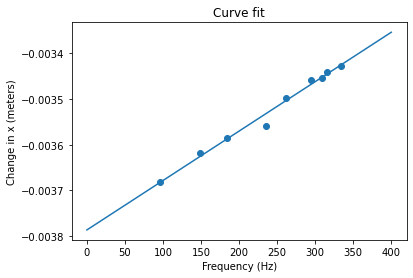

In [303]:
values = np.linspace(0,400)
plot.plot(values,mycurve(values,fit[0],fit[1]))
plot.scatter(np.array(frequency),-np.array(cm_positions)[:,0])
plot.title('Curve fit')
plot.xlabel('Frequency (Hz)')
plot.ylabel('Change in x (meters)')

In [292]:
#Calculate uncertainty propagation 
d_err = np.sqrt(lengtherr[0]**2 + lengtherr[2]**2)
fs2_err = np.sqrt(lengtherr[2]**2 + lengtherr[3]**2 + lengtherr[4]**2 + lengtherr[5]**2 + lengtherr[6]**2)
final_err = np.sqrt((((4*(f+s2)/fit[0])*d_err))**2 + ((4*d/fit[0])*fs2_err)**2 + ((-4*d*(f + s2)/fit[0]**2)*np.sqrt(covar[0,0]))**2)

In [316]:
(final_err)

2091346.102856585

In [312]:
4*d*(f + s2)/fit[0]

45871474.55128704